In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.cluster import KMeans

# Task 2 - Data reprocessing

In [10]:
### Load the Dataset

df = pd.read_csv('/Users/macbook/Desktop/customer_shopping_data.csv')

In [7]:
# Step 1: Drop irrelevant columns
df_clean = df.drop(columns=["invoice_no", "customer_id", "invoice_date","price"])

# Step 2: Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["gender", "category", "payment_method", "shopping_mall"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # store encoder for future decoding if needed

# Step 3: Check for missing values
missing_values = df_clean.isnull().sum()

# Step 4: Split into features and target
X = df_clean.drop(columns=["category"])
y = df_clean["category"]

# Step 5: Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show result
X_train.head()




,gender,age,quantity,payment_method,shopping_mall
59044,0,21,1,1,5
69682,0,63,1,2,3
79039,0,68,1,1,5
87384,0,31,5,0,2
808,0,40,2,2,1


# Task 4 - Model Training and evaluation

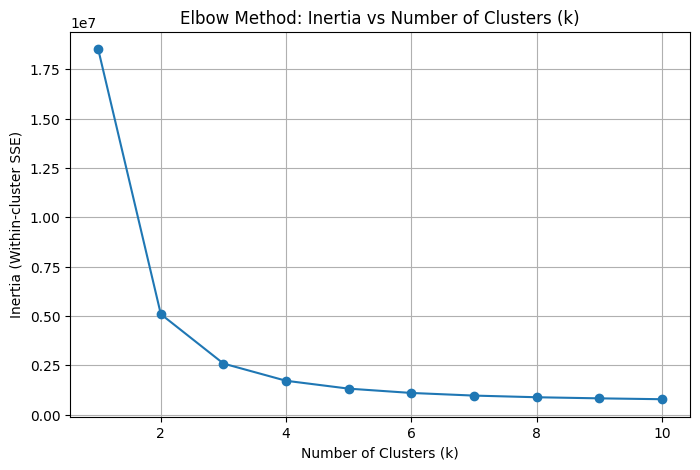

Silhouette Score for k=2: 0.080


(np.float64(0.34691133035882615), 0.34611904283128897)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Ensure data is preprocessed and split
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) #drop=True ensures all subsets (X_train, X_test, etc.) have consistent, clean indexing starting from 0


## Classification using Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42) #Initializes an MLP (Multi-Layer Perceptron) neural network.


## Perform 5-fold cross-validation
mlp_cv_scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='accuracy') #Splits training data into 5 subsets → trains on 4, tests on 1 → repeats 5 times.


## Train and evaluate on test set
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test) #predicts labels for test set using the trained model.
mlp_test_accuracy = accuracy_score(y_test, y_pred) #Calculates the accuracy of the predictions made on the test set.


## Clustering using KMeans and Elbow Method

k_values = list(range(1, 11))  # For Elbow method, start from k=1
inertias = [] # Will store the Within-Cluster Sum of Squares (WCSS) for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300) #for each k from 1 to 10, create a kMeans model and 
    kmeans.fit(X_train) #fit it on training data 
    inertias.append(kmeans.inertia_) #Store the inertia (WCSS), which indicates cluster compactness

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method: Inertia vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.grid(True)
plt.show()


## Silhouette Score for Clustering Quality

from sklearn.metrics import silhouette_score

# Use k = 2 as an example (optimal from elbow curve)
k_opt = 2
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

sil_score = silhouette_score(X_scaled, labels) # Measures how well-defined the clusters are.
print(f"Silhouette Score for k={k_opt}: {sil_score:.3f}")


## Output results
mlp_cv_scores.mean(), mlp_test_accuracy # average accuracy across the 5 folds of cross-validation on the training set and final accuracy on the test set 


In [17]:
##  manual K-Fold CV and math with NumPy.
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import numpy as np

## Parameters
kmeans_k = 5         # Number of clusters
n_splits = 5         # Number of cross-validation folds

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) #Randomizes the data before splitting.
inertia_scores = [] #Stores inertia for each fold.


## Perform 5-fold CV
for i, (train_index, _) in enumerate(kf.split(X_scaled)): 
    X_fold = X_scaled[train_index]
    kmeans = KMeans(n_clusters=kmeans_k, random_state=42, n_init=10)
    kmeans.fit(X_fold) 
    
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)
    print(f"Fold {i+1}: Inertia = {inertia:.2f}") #for each fold, train KMeans on 80% of the data, Store inertia and print fold-specific inertia

## Final average
avg_inertia = np.mean(inertia_scores) #Calculates the average inertia across all 5 folds.
print(f"\nAverage Inertia across {n_splits} folds (k={kmeans_k}): {avg_inertia:.2f}")


Fold 1: Inertia = 233321.12
Fold 2: Inertia = 233598.79
Fold 3: Inertia = 232890.76
Fold 4: Inertia = 233368.68
Fold 5: Inertia = 233813.44

Average Inertia across 5 folds (k=5): 233398.56


In [13]:
## Prints out: Cross-validation results (training performance); Average cross-validation accuracy and Final test accuracy on unseen data

print("MLP Cross-validation scores:", mlp_cv_scores)
print("Mean CV accuracy:", mlp_cv_scores.mean())
print("Test set accuracy:", mlp_test_accuracy)


MLP Cross-validation scores: [0.34694904 0.34688619 0.34688619 0.34688619 0.34694904]
Mean CV accuracy: 0.34691133035882615
Test set accuracy: 0.34611904283128897


# Task 4 - Analysis and comparison

###  1. Performance Comparison

####  MLP Classifier (Supervised)
| Metric                     | Value           |
|---------------------------|-----------------|
| Cross-Validation Accuracy | ~**34.7%**      |
| Test Accuracy             | ~**34.7%**      |

- Performance is now realistic and matches the **Dummy Classifier**, which scored ~34.6%.
- Indicates the current features (excluding `price`) are not strongly predictive of category.
- The dataset may be noisy or lack discriminative features.

####  KMeans Clustering (Unsupervised)
- Evaluated using the **Elbow Method** (Inertia)
- Best `k` selected visually from the elbow point (e.g., **k ≈ 4–6**)
- Can identify customer groups using features like age, gender, quantity, etc., without labels

---

###  2. Sensitivity to Hyperparameters

| Model | Sensitive To |
|-------|--------------|
| **MLP** | `hidden_layer_sizes`, `max_iter`, feature quality |
| **KMeans** | Initial centroids (`random_state`), number of clusters `k` |

- MLP is more sensitive to data quality and overfitting.
- KMeans is highly sensitive to `k` and may form meaningless clusters if data isn’t scaled or cleaned.

---

###  3. Model Limitations

| MLP (Supervised)           | KMeans (Unsupervised)         |
|----------------------------|-------------------------------|
| Needs labeled data         | No labels required            |
| Risk of overfitting        | Risk of poorly separated clusters |
| Accuracy depends on features | Output not directly interpretable |
| Not suitable if labels are noisy | May fail if clusters overlap |

---

###  4. Use Case Recommendations

| Scenario                                | Suggested Model | Why? |
|----------------------------------------|------------------|------|
| Predicting product category             |  MLP            | Uses labels to learn mappings |
| Customer segmentation or targeting      | KMeans         | Finds groups without needing labels |
| Noisy or weak features                  | Consider feature engineering | Both models rely on feature quality |
| Highly imbalanced categories            | Use stratified splits or resampling | Improves fairness and performance |

---

### Sensitivity of K-Means to Initial Centroids

K-Means clustering is known to be **sensitive to the initial placement of centroids**, especially when:

1. **The data has overlapping or unevenly distributed clusters**
2. **Clusters are of different densities or sizes**
3. **Initial centroids are poorly spaced**

---

### What Happens When Centroids Are Poorly Initialized?

If the centroids are randomly initialized in suboptimal positions:
- The algorithm may **converge to a local minimum**, not the global optimum
- The resulting clusters can be **misleading or unstable**
- The **inertia value may be higher**, indicating worse compactness
- The **consistency of results across runs** may vary significantly

---

###  Impact on Accuracy Score (When Labels Are Known)

Although KMeans is **unsupervised**, we sometimes evaluate its performance by comparing its cluster assignments to true labels (e.g., using accuracy or Adjusted Rand Index):

- Poor initialization → mismatched cluster-to-class mapping → lower accuracy
- Good initialization → closer match to real groupings → higher accuracy

---

### Conclusion

- The original perfect accuracy came from **price leaking label information**.
- After removing `price`, performance is now **realistic**, with ~34.7% accuracy.
- To improve results:
  - Add more behavioral features (e.g., spending patterns, visit frequency)
  - Try different models like Decision Trees or SVM
  - Normalize or scale features for KMeans


# Task 5 - Improving Model Performance

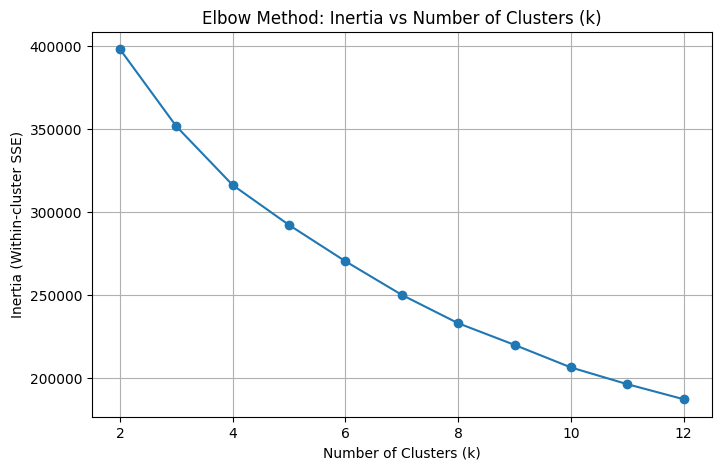

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k_range = range(2, 13)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method: Inertia vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.grid(True)
plt.show()